<p align="center">
<img src="https://github.com/datacamp/Market-Basket-Analysis-in-python-live-training/blob/master/assets/datacamp.svg?raw=True" alt = "DataCamp icon" width="50%">
</p>
<br><br>

## **Market Basket Analysis in Python**

Welcome to this hands-on training event where you will learn how to perform Market Basket Analysis in Python. 

In this session, you will learn how to:
* Identify patterns in consumer decision-making with the `mlxtend` package.
* Use metrics to evaluate the properties of patterns.
* Construct "rules" that provide concrete recommendations for businesses.
* Visualize patterns and rules using `seaborn` and `matplotlib`.

## **The Dataset**

The dataset used in this webinar is divided into three CSV files: `olist_order_items_dataset.csv`, `olist_products_dataset.csv`, and `product_category_name_translation.csv`.

In the `olist_order_items_dataset.csv` file, we'll make use the following columns:

- `order_id`: The unique identifier for atransaction
- `product_id`: The unique identifier for a product

In the `olist_order_items_dataset.csv` file, we'll make use the following columns:

- `product_id`: The unique identifier for a product
- `product_category_name`: The name of an item's product category in Portuguese

In the `product_category_name_translation.csv` file, we'll make use the following columns:

- `product_category_name`: The name of an item's product category in Portuguese
- `product_category_name_english`: The name of an item's product category in English


## **Data Preparation**

The first step in a Market Basket Analysis (MBA) project is to determine what constitutes an "item" and an "itemset." This will depend on the dataset we're using and the question we're attempting to answer.

* **Music streaming service**
	* Item: Song
	* Itemset: User song library
* **Grocery store**
	* Item: Grocery
	* Itemset: Basket of items purchased
* **Ebook store**
	* Item: Book
	* Itemset: User library

In [32]:
# Import modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define path to data.
data_path = 'https://github.com/datacamp/Market-Basket-Analysis-in-python-live-training/raw/master/data/'

# Load orders dataset
orders = pd.read_csv(data_path+'olist_order_items_dataset.csv')

# Load products items dataset
products = pd.read_csv(data_path+'olist_products_dataset.csv')

# Load translations dataset
translations = pd.read_csv(data_path+'product_category_name_translation.csv')

In [2]:
# Print information about each dataset.
print(orders.info())
print(products.info())
print(translations.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght    

In [3]:
# Preview relevant columns of orders
orders[['order_id','product_id']].head()

# Preview relevant columns of products
products[['product_id','product_category_name']].head()

# Preview translations.
translations.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [5]:
# Create dictionary translate product categories to English.
translate = dict(zip(translations['product_category_name'], translations['product_category_name_english']))

# Perform translation on products DataFrame.
products['product_category_name_english'] = products['product_category_name'].apply(lambda x: translate.get(x))

# Print English names.
print(products['product_category_name_english'])

0                        perfumery
1                              art
2                   sports_leisure
3                             baby
4                       housewares
                   ...            
32946              furniture_decor
32947    construction_tools_lights
32948               bed_bath_table
32949        computers_accessories
32950               bed_bath_table
Name: product_category_name_english, Length: 32951, dtype: object


In [6]:
# Create dictionary that maps IDs to product names
idsToNames = dict(zip(products['product_id'], products['product_category_name_english']))

# Map IDs to product names in orders DataFrame
orders['product_category_name_english'] = orders['product_id'].apply(lambda x: idsToNames.get(x))

In [9]:
# Apply the .info() method to the orders DataFrame.
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111023 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       111023 non-null  object 
 1   order_item_id                  111023 non-null  int64  
 2   product_id                     111023 non-null  object 
 3   seller_id                      111023 non-null  object 
 4   shipping_limit_date            111023 non-null  object 
 5   price                          111023 non-null  float64
 6   freight_value                  111023 non-null  float64
 7   product_category_name_english  111023 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 7.6+ MB
None


In [10]:
# Drop NaNs.
orders.dropna(inplace=True)

# Print number of unique items.
print(len(orders['product_id'].unique()))

# Print number of unique categories.
print(len(orders['product_category_name_english'].unique()))

32328
71


In [11]:
import pandas as pd

# Get set of order ids.
order_ids = orders['order_id'].unique().tolist()

# Define empty list of transactions.
transactions = []

# Iterate over list of order ids.
for order in order_ids:
	transactions.append(';'.join(orders[orders['order_id'] == order]['product_category_name_english']))

# Convert to DataFrame.
transactions = pd.DataFrame(transactions, columns = ['transactions'])

# Save data.
transactions.to_csv('/Users/isaiah/Desktop/olist_transactions.csv', index = False, sep = ',')

KeyboardInterrupt: ignored

In [15]:
# Load transaction data.
transactions = pd.read_csv(data_path + 'olist_transactions.csv')

# Preview data.
transactions['transactions'].value_counts()

health_beauty                                                                                                                        8154
bed_bath_table                                                                                                                       7967
sports_leisure                                                                                                                       6949
computers_accessories                                                                                                                5894
watches_gifts                                                                                                                        5320
                                                                                                                                     ... 
cine_photo;sports_leisure                                                                                                               1
construction_tools_safety;construc

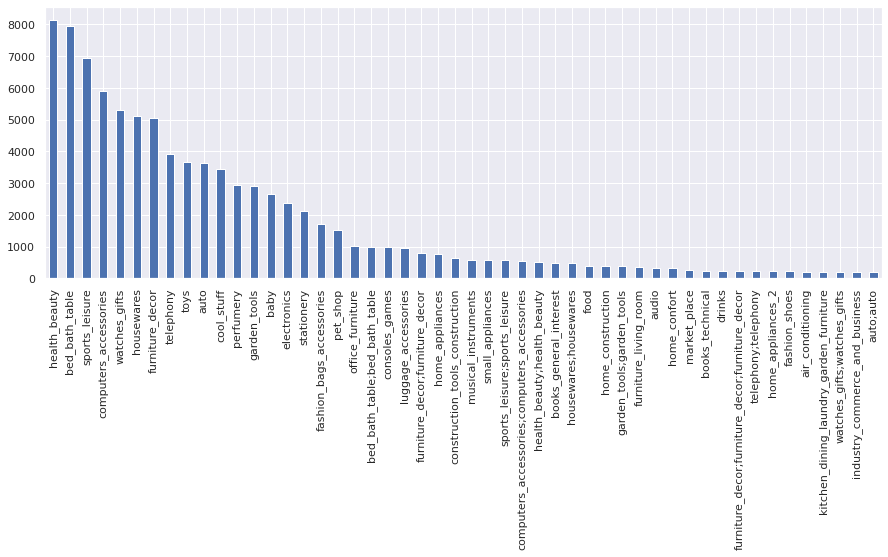

In [20]:
# Import seaborn and set formatting.
import seaborn as sns
sns.set()

# Plot 50 largest categories of transactions.
transactions['transactions'].value_counts()[0:50].plot(kind='bar', figsize=(15,5))

In [21]:
# Convert the DataFrame column to list of lists.
transactions = transactions['transactions'].tolist()

# Convert list items into lists.
transactions = [list(transaction.split(';')) for transaction in transactions]

# Print subset of lists.
print(transactions[0:2])

[['cool_stuff'], ['pet_shop'], ['furniture_decor'], ['perfumery'], ['garden_tools'], ['housewares'], ['telephony'], ['garden_tools'], ['health_beauty'], ['books_technical'], ['health_beauty'], ['fashion_bags_accessories'], ['bed_bath_table'], ['garden_tools', 'garden_tools'], ['sports_leisure'], ['consoles_games'], ['perfumery'], ['sports_leisure'], ['cool_stuff'], ['bed_bath_table'], ['telephony'], ['office_furniture'], ['fashion_bags_accessories'], ['cool_stuff'], ['sports_leisure'], ['luggage_accessories'], ['furniture_decor'], ['food'], ['furniture_decor'], ['agro_industry_and_commerce'], ['furniture_decor'], ['sports_leisure', 'sports_leisure', 'sports_leisure'], ['telephony'], ['electronics'], ['bed_bath_table'], ['garden_tools'], ['computers_accessories'], ['cool_stuff'], ['furniture_decor'], ['electronics', 'electronics', 'electronics'], ['construction_tools_construction'], ['computers_accessories'], ['bed_bath_table'], ['health_beauty', 'health_beauty'], ['pet_shop'], ['bed_ba

In [23]:
# Convert to set and then list.
transactions = [list(set(transaction)) for transaction in transactions]

In [25]:
# Print length of list.
print(len(transactions))

# Count number of unique item categories for each transaction.
counts = [len(transaction) for transaction in transactions]

# Print median transaction length.
print(np.median(counts))

# Print maximum transaction length.
print(np.max(counts))

97256
1.0
3


---
<center><h1> Q&A 1</h1> </center>

---

## **Association Rules and Metrics**

In [26]:
from mlxtend.preprocessing import TransactionEncoder

# Instantiate an encoder.
encoder = TransactionEncoder()

# Fit encoder to list of lists.
encoder.fit(transactions)

# Transform lists into one-hot encoded array.
onehot = encoder.transform(transactions)

# Convert array to pandas DataFrame.
onehot = pd.DataFrame(onehot, columns = encoder.columns_)

In [28]:
# Print a summary of the DataFrame.
onehot.head()

,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,books_technical,cds_dvds_musicals,christmas_supplies,cine_photo,computers,computers_accessories,consoles_games,construction_tools_construction,construction_tools_lights,construction_tools_safety,cool_stuff,costruction_tools_garden,costruction_tools_tools,diapers_and_hygiene,drinks,dvds_blu_ray,electronics,fashio_female_clothing,fashion_bags_accessories,fashion_childrens_clothes,fashion_male_clothing,fashion_shoes,fashion_sport,fashion_underwear_beach,fixed_telephony,flowers,food,food_drink,furniture_bedroom,furniture_decor,furniture_living_room,furniture_mattress_and_upholstery,garden_tools,health_beauty,home_appliances,home_appliances_2,home_comfort_2,home_confort,home_construction,housewares,industry_commerce_and_business,kitchen_dining_laundry_garden_furniture,la_cuisine,luggage_accessories,market_place,music,musical_instruments,office_furniture,party_supplies,perfumery,pet_shop,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [30]:
# Print mean over all rows for each column.
print(onehot.mean(axis=0))

agro_industry_and_commerce    0.001871
air_conditioning              0.002601
art                           0.002077
arts_and_craftmanship         0.000236
audio                         0.003599
                                ...   
stationery                    0.023762
tablets_printing_image        0.000812
telephony                     0.043175
toys                          0.039956
watches_gifts                 0.057827
Length: 71, dtype: float64


In [31]:
# Print mean of all columns for each row.
print(onehot.sum(axis=1).value_counts())

1    96530
2      711
3       15
dtype: int64


In [ ]:
# Print mean of all columns for each row.
print(onehot.info())

In [ ]:
# Add computers + computer_accessories to DataFrame.
onehot['sports_leisure_health_beauty'] = np.logical_and(onehot['sports_leisure'], onehot['health_beauty'])

# Print support values.
print(onehot.mean(axis = 1))

In [ ]:
# Add computers + computer_accessories to DataFrame.
onehot['books'] = onehot['books_imported'] + onehot['books_general_interest'] + onehot['books_technical']

# Print support values.
print(onehot[['books','books_imported','books_general_interest','books_technical']].mean(axis=0))

In [ ]:
# Define function to compute confidence.
def confidence(antecedent, consequent, data = onehot):
	joint_support = np.logical_and(data[antecedent], data[consequent]).mean()
	antecedent_support = data[antecedent].mean()
	return joint_support / antecedent_support

# Compute confidence(sports_leisure -> health_beauty)
confidence('sports_leisure','health_beauty')

# Compute confidence(health_beauty -> sports_leisure)
confidence('health_beauty','sports_leisure')

---
<center><h1> Q&A 2</h1> </center>

---

## **The Apriori Algorithm and Pruning**

In [33]:
from mlxtend.frequent_patterns import apriori

# Apply apriori algorithm to data.
frequent_itemsets = apriori(onehot, min_support = 0.01)

# Print frequent itemsets.
print(frequent_itemsets)

     support itemsets
0   0.040070      (5)
1   0.029664      (6)
2   0.096827      (7)
3   0.068777     (15)
4   0.010920     (16)
5   0.037345     (20)
6   0.026219     (26)
7   0.019166     (28)
8   0.066310     (39)
9   0.036173     (42)
10  0.090853     (43)
11  0.060500     (49)
12  0.010632     (53)
13  0.013089     (57)
14  0.032512     (59)
15  0.017582     (60)
16  0.079378     (65)
17  0.023762     (66)
18  0.043175     (68)
19  0.039956     (69)
20  0.057827     (70)


In [34]:
# Apply apriori algorithm to data.
frequent_itemsets = apriori(onehot, min_support = 0.001, use_colnames = True)

# Print frequent itemsets.
print(frequent_itemsets)

     support                                   itemsets
0   0.001871               (agro_industry_and_commerce)
1   0.002601                         (air_conditioning)
2   0.002077                                      (art)
3   0.003599                                    (audio)
4   0.040070                                     (auto)
5   0.029664                                     (baby)
6   0.096827                           (bed_bath_table)
7   0.005264                   (books_general_interest)
8   0.002673                          (books_technical)
9   0.001316                       (christmas_supplies)
10  0.001861                                (computers)
11  0.068777                    (computers_accessories)
12  0.010920                           (consoles_games)
13  0.007691          (construction_tools_construction)
14  0.002509                (construction_tools_lights)
15  0.001717                (construction_tools_safety)
16  0.037345                               (cool

In [35]:
# Apply apriori algorithm to data.
frequent_itemsets = apriori(onehot, min_support = 0.00005, use_colnames = True)

# Print frequent itemsets.
print(frequent_itemsets)

      support                           itemsets
0    0.001871       (agro_industry_and_commerce)
1    0.002601                 (air_conditioning)
2    0.002077                              (art)
3    0.000236            (arts_and_craftmanship)
4    0.003599                            (audio)
..        ...                                ...
101  0.000144    (health_beauty, sports_leisure)
102  0.000113       (housewares, sports_leisure)
103  0.000051  (luggage_accessories, stationery)
104  0.000051    (watches_gifts, sports_leisure)
105  0.000062                 (toys, stationery)

[106 rows x 2 columns]


In [36]:
# Apply apriori algorithm to data with a two-item limit on the itemset size.
frequent_itemsets = apriori(onehot, min_support = 0.00005, max_len = 2, use_colnames = True)

In [37]:
from mlxtend.frequent_patterns import association_rules

# Recover association rules using support and a minimum threshold.
rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.0001)

# Print rules.
print(rules)

                    antecedents  ... conviction
0                        (baby)  ...   0.908527
1              (bed_bath_table)  ...   0.972091
2                        (baby)  ...   0.969375
3                  (cool_stuff)  ...   0.975709
4                        (baby)  ...   0.937590
5             (furniture_decor)  ...   0.972145
6                        (baby)  ...   0.966408
7                        (toys)  ...   0.975104
8              (bed_bath_table)  ...   0.963679
9                  (cool_stuff)  ...   0.905667
10             (bed_bath_table)  ...   0.940683
11            (furniture_decor)  ...   0.913084
12             (bed_bath_table)  ...   0.910210
13              (health_beauty)  ...   0.904299
14               (home_confort)  ...   1.012881
15             (bed_bath_table)  ...   1.000486
16             (bed_bath_table)  ...   0.941499
17                 (housewares)  ...   0.906253
18  (construction_tools_lights)  ...   0.977770
19            (furniture_decor)  ...   0

In [39]:
# Recover association rules using confidence as the metric.
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.01)

# Preview association rules.
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(art),(furniture_decor),0.002077,0.066310,0.000051,0.024752,0.373287,-0.000086,0.957388
1,(audio),(watches_gifts),0.003599,0.057827,0.000062,0.017143,0.296452,-0.000146,0.958606
2,(furniture_decor),(bed_bath_table),0.066310,0.096827,0.000720,0.010854,0.112101,-0.005701,0.913084
3,(home_confort),(bed_bath_table),0.004082,0.096827,0.000442,0.108312,1.118618,0.000047,1.012881
4,(construction_tools_lights),(furniture_decor),0.002509,0.066310,0.000113,0.045082,0.679872,-0.000053,0.977770


In [40]:
# Select rules with a consequent support above 0.07.
rules = rules[rules['consequent support'] > 0.07]

# Print rules.
print(rules)

         antecedents       consequents  ...  leverage  conviction
2  (furniture_decor)  (bed_bath_table)  ... -0.005701    0.913084
3     (home_confort)  (bed_bath_table)  ...  0.000047    1.012881

[2 rows x 9 columns]


In [41]:
# Select rules with leverage higher than 0.0.
rules = rules[rules['leverage'] > 0.0]

# Print rules.
print(rules)

      antecedents       consequents  ...  leverage  conviction
3  (home_confort)  (bed_bath_table)  ...  0.000047    1.012881

[1 rows x 9 columns]


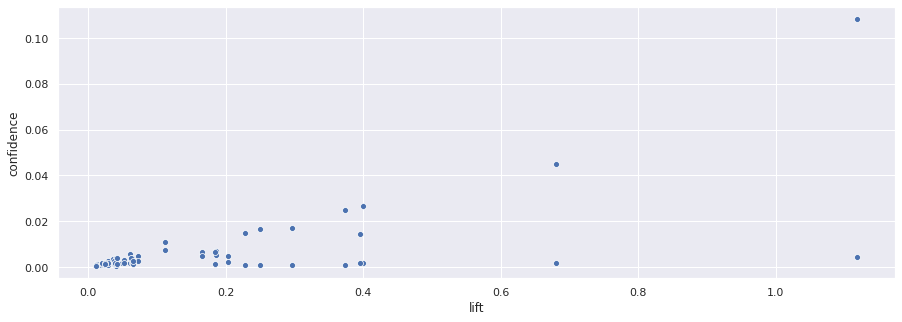

In [43]:
# Recover association rules using support and a minimum threshold.
rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.00001)

# Plot support against confidence.
plt.figure(figsize=(15,5))
sns.scatterplot(x="lift", y="confidence", data=rules)

---
<center><h1> Q&A 3</h1> </center>

---

### **Examples on use of markdown**

#### **Images**

To add images, gifs, or other assets of that kind, make sure to use the HTML `<img>` function as in the following 
```
<p align="">
<img src="" alt = "alt-text" width="100%">
</p>
<br><br>
```

- The `align` argument takes in `"center"`, `"left"`, `"right"`.
- The `src` argument takes in the raw link of your image.
- The `width` argument takes in a percentage, where `100%` is the original size of the image. 


#### **Formulas**

To use formulas, feel free to use Latex Notation as such:

$y = ax + b$

You can even use color schemes like in this example, where coefficients are colored in red

$y = \color{red}a x + \color{red}b$

#### **Changing font color and size**

To change or highlight specific texts in a color, you can use the following

```
<font color="00AAFF">**Example text**</font>
```

Where the results will look like <font color="00AAFF">**Example text**</font>.

- The `color` argument takes in a HEX code for your color. 